# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [4]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

In [5]:
student_data.head()

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4


Text(0.5, 1.0, 'Scatter Plot of Age vs Tardiness')

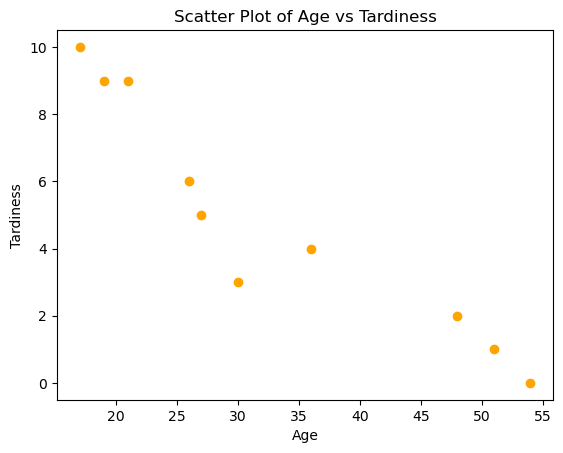

In [6]:
# Your code here
#define x and y 
x = student_data['Age']
y = student_data['Tardies']

#Create the scatterplot
plt.scatter(x,y, color='orange')

#labels 
plt.xlabel('Age')
plt.ylabel('Tardiness')
plt.title('Scatter Plot of Age vs Tardiness')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

*your explanation here*


I see a linear relationship, in other words, the higher the age the less a student likely to be late to class 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [7]:
# your code here
#need to create a matrix to be able to calculate covariance 
covariance_matrix = student_data.cov()
print(covariance_matrix)
covariance_cal=covariance_matrix.loc['Age','Tardies']
print(covariance_cal)

#correlation
correlation_matrix_student = student_data.corr()
correlation_age_tardies = correlation_matrix_student.loc['Age','Tardies']
print(correlation_matrix_student)
print(correlation_age_tardies)

                Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444
-45.56666666666666
              Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000
-0.9391626886887121


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [12]:
#Training data behavior 
#import library 
from sklearn.model_selection import train_test_split

#Define the indepent variable (x) and depent variable(y)
x= student_data[['Age']] #Using double brackets to get a 2D array for scikit-learn
y= student_data['Tardies']

#splitting the data set for train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42) #choosing 42 as random_state for reproductability purposes 

#Initialize the linear regression model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

#training the model the test data
lm.fit(x_train,y_train)
print(f'lm intercept is {lm.intercept_} and the coeficient increment is {lm.coef_}')

#Making predictions using test data
y_predict= lm.predict(x_train)
print(f'The student tardines are {y_predict}' ) 

#calculate MSE and R2 score 
from sklearn.metrics import mean_squared_error,r2_score
print('Score:')
print(r2_score(y_train,y_predict))
print('MSE:')
print(mean_squared_error(y_predict,y_train))

#r2_score refers to the stregnth of the relationship between variables 
#MSE refers to how much does y moves in respect to the mean 

lm intercept is 16.141327623126337 and the coeficient increment is [-0.38062099]
The student tardines is [9.67077088 6.24518201 5.86456103 4.72269807 2.43897216 8.14828694
 8.90952891]
Score:
0.8456922510706638
MSE:
1.007724074640563


Plot your regression model on your scatter plot.

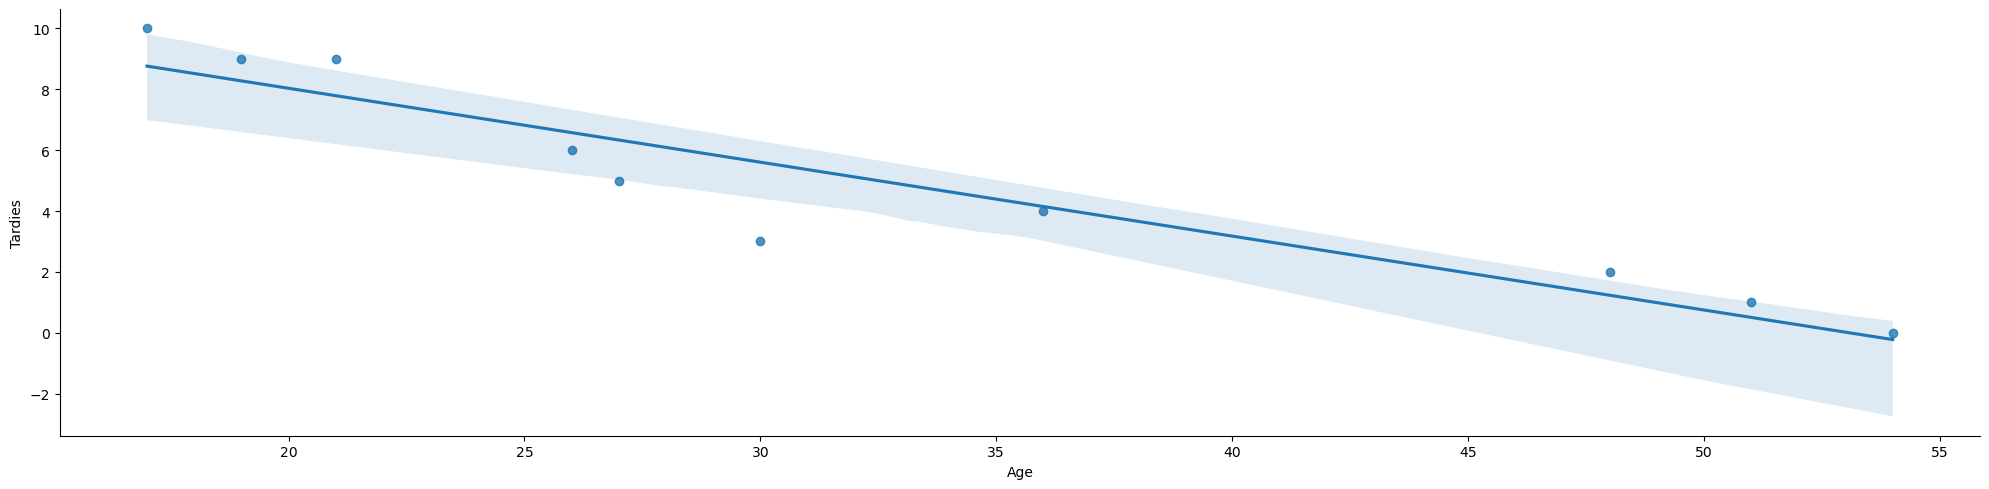

In [17]:
# Your code here.
sns.lmplot(x='Age',y='Tardies', data=student_data,aspect=4)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

*your explanation here*

I believe the model is good fit, however, to test for accuracy and predictability we need more data as the training data might be bias given that there are only 3 rows being evaluated 


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [54]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("C:\\Users\\anama\\OneDrive\\Documents\\GitHub\\lab-regression-analysis-en\\vehicles.csv")
vehicles.shape

(35952, 15)

In [55]:
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [42]:
# Your code here.
relevant_columns=['Year','Cylinders', 'Fuel Barrels/Year','Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
df_vehicles = vehicles[relevant_columns]


In [56]:
df_vehicles.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


In [43]:
#corelation matrix 
correlation_matrix_vehicles = df_vehicles.corr()

#calculation the CO2 Emissions Grams/Mile correlations 
co2_correlations = correlation_matrix_vehicles['CO2 Emission Grams/Mile'].drop('CO2 Emission Grams/Mile')
print('CO2 correlations')
print(co2_correlations)

#Identify the variables with the highest correlation 
highest_correlation = co2_correlations.idxmax()
lowest_correlation = co2_correlations.idxmin()
print(f'The variable with the most influence in CO2 is {highest_correlation} and the one with the least influence is {lowest_correlation}')

CO2 correlations
Year                -0.222300
Cylinders            0.752393
Fuel Barrels/Year    0.986189
Combined MPG        -0.926229
Fuel Cost/Year       0.930865
Name: CO2 Emission Grams/Mile, dtype: float64
The variable with the most influence in CO2 is Fuel Barrels/Year and the one with the least influence is Combined MPG


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

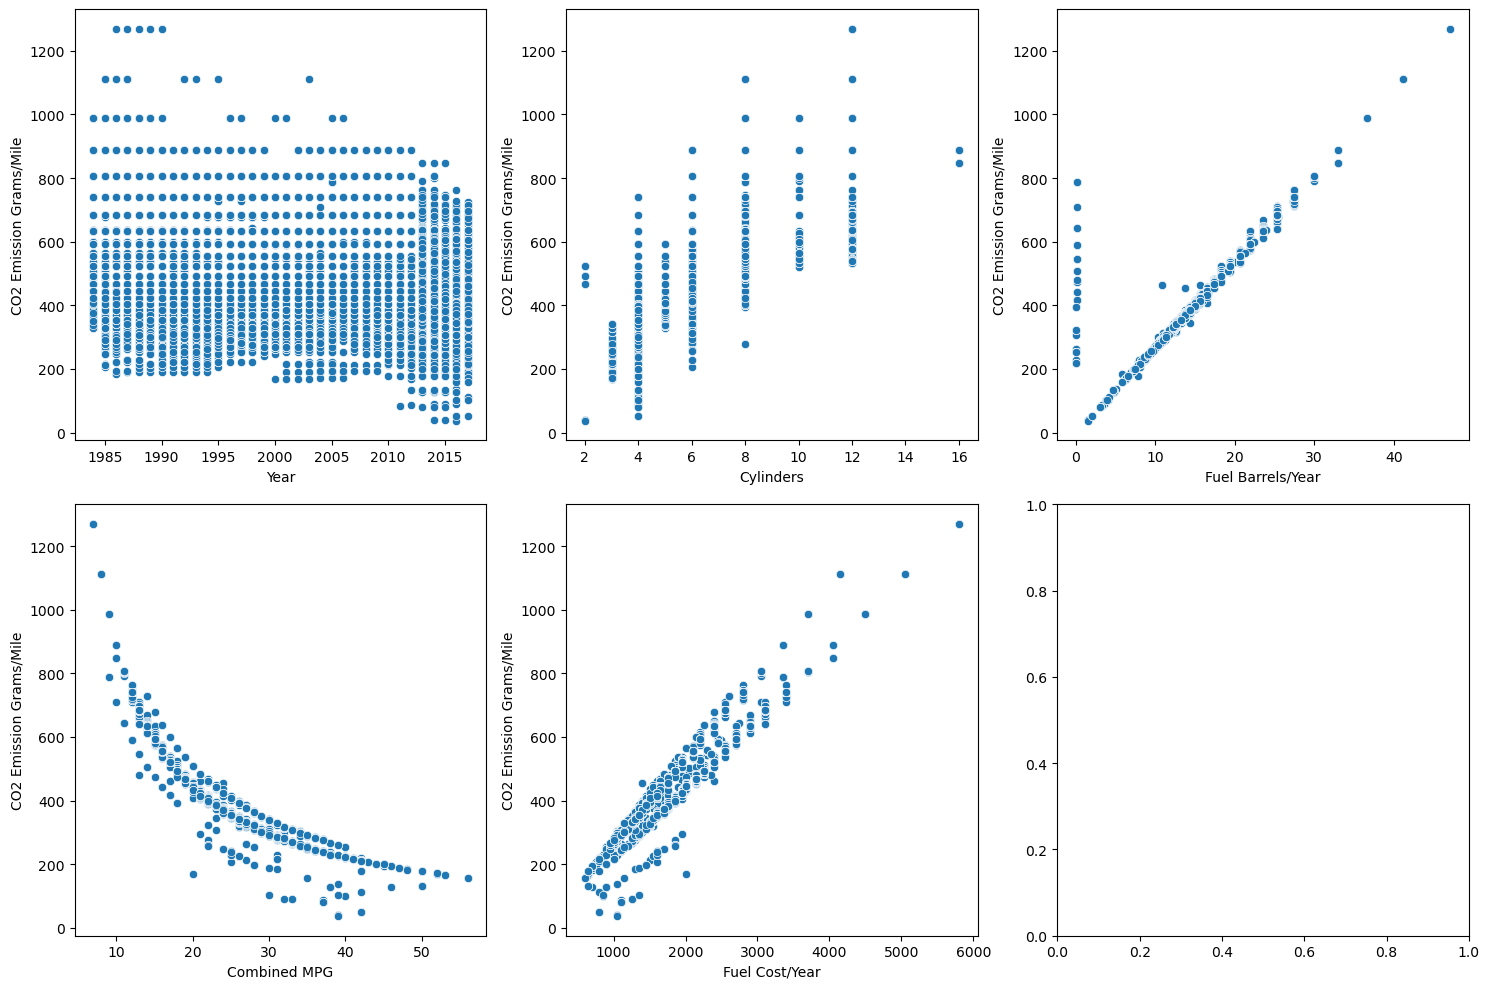

In [51]:
# Your code here.

#scatter plotting all the variables againts CO2 Emission
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, column in enumerate(relevant_columns[:-1]):
    sns.scatterplot(x=column,y='CO2 Emission Grams/Mile', data=df_vehicles,ax=axs[i//3,i%3])


plt.tight_layout()
plt.show()

#Based on the visualization and correlations, I believe a linear regression model taking Fuel Barrels/Year


In [63]:
#building the regression model comparing performance 
#Training and test data behavior 

#Define the indepent variable (x) and depent variable(y)
x=df_vehicles.drop('CO2 Emission Grams/Mile', axis=1)
y= df_vehicles['CO2 Emission Grams/Mile']

#splitting the data set for train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42) #choosing 42 as random_state for reproductability purposes 

#get number of features from training data 
n_features = len(x_train.columns)
co2_emissions_score = []

for i in range(n_features):
    feature_name= x_train.columns[i]
    feature_train = x_train[feature_name].to_numpy().reshape(-1,1)
    feature_test = x_test[feature_name].to_numpy().reshape(-1,1)

    #Initialize the linear regression model
    lm=LinearRegression()

    #training the model the test data
    lm.fit(feature_train,y_train.values.reshape(-1,1))

    #Making predictions using test data
    y_train_predict= lm.predict(feature_train)
    y_test_pred = lm.predict(feature_test)

    #calculate MSE and R2 score 
    train_score = lm.score(feature_train, y_train.values.reshape(-1,1))
    test_score = lm.score(feature_test,y_test.values.reshape(-1,1))
    mse_train = mean_squared_error(y_train,y_train_predict)
    mse_test= mean_squared_error(y_test,y_test_pred)

    #adding the calculations to the score list 
    co2_emissions_score.append([feature_name,train_score,test_score,mse_train,mse_test])

#print scores as methods 
score_vehice_df =pd.DataFrame(co2_emissions_score, columns=['Feature', 'Train Score', 'Test Score', 'Train MSE', 'Test MSE'])
print(score_vehice_df)


#r2_score refers to the stregnth of the relationship between variables 
#MSE refers to how much does it moves in respect to the mean 

             Feature  Train Score  Test Score     Train MSE      Test MSE
0               Year     0.048599    0.051358  13566.309852  13260.633877
1          Cylinders     0.565352    0.567861   6197.773458   6040.679308
2  Fuel Barrels/Year     0.971923    0.974101    400.351983    362.030807
3       Combined MPG     0.854769    0.865257   2070.897797   1883.513709
4     Fuel Cost/Year     0.867468    0.864215   1889.807353   1898.077071


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
#print scores as methods 
print(score_vehice_df)

#Based not only on the results of scores and MSE for both the train and test scores but also on the scatter plots, it would be advice to focus on 3 features only: Fuel Barrels/Year, Fuel Cost/Year,Combined MPG.
#Being the first one the one with the highest score for confidence on its prediction. 



## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here.

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here.

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*